In [ ]:
!pip install netCDF4
!pip install keras==2.12.0
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.0 MB/s eta 0:00:00
  Attempting uni

In [ ]:
import pandas as pd
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset

# visualization
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines as mlines
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines as mlines
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
# machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import LSTM
from sklearn.decomposition import PCA
from keras.layers import Dense, Activation, Attention
from keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import tensorflow as tf

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers
from keras.layers import Dropout, BatchNormalization
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import time
import math

In [ ]:
# load the data
data_cuxhaven = pd.read_csv("cuxhaven_de.csv")

# rename the columns
data_cuxhaven.columns = ['time', 'wind_u10', 'wind_v10', 'slp', 'weight', 'surge']

In [ ]:
# load the data
data_cuxhaven = pd.read_csv("cuxhaven_de1.csv")

# rename the columns
data_cuxhaven.columns = ['future_dates', 'wind_u10', 'wind_v10', 'slp', 'weight', 'surge']

In [ ]:
data_cuxhaven1.head()

,future_dates,wind_u10,wind_v10,slp,weight,surge
0,1053008,9.304976,0.647637,101466.5237,1.000000,0.040876
1,1053008,11.284721,0.234706,101549.9479,0.925527,0.040876
2,1053008,9.304976,1.105641,101377.5539,0.668373,0.040876
3,1053008,7.498699,1.067838,101748.3817,0.654728,0.040876
4,1053008,7.834623,0.971875,101808.9004,0.624854,0.040876


In [ ]:
import pandas as pd


data_cuxhaven.c_name='future'
data_cuxhaven['future']=data_cuxhaven['future']+(1108066-1073008)

# Save the modified DataFrame back to the CSV file

#data_cuxhaven1.to_csv('cuxhaven_future.csv', index=False)
#fdata=data_cuxhaven1['future']


KeyError: 'future'

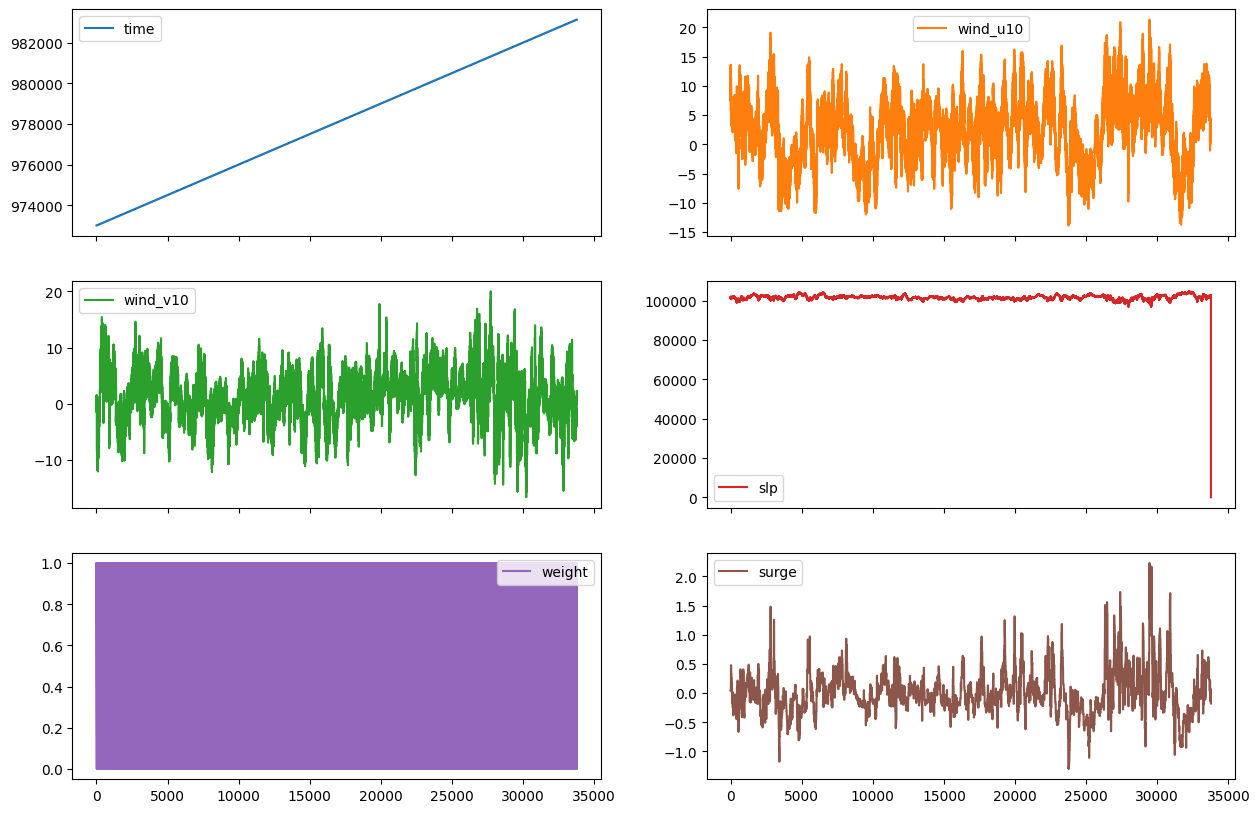

In [ ]:
data_cuxhaven.plot(subplots=True, layout=(3, 2), figsize=(15,10))

plt.show()

In [ ]:
# checking missing values
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(data_cuxhaven)

,Total,Percent
wind_v10,1,0.0
slp,1,0.0
weight,1,0.0
surge,1,0.0
time,0,0.0
wind_u10,0,0.0


In [ ]:
# build a function for creating time lagged time series data
def time_lag(data, lags):
    """
    Transforms the dataset to  a time series of grid information and spits back the time lagged time series
    data - the full name of the csv file
    """
    time_orig = pd.to_datetime('1900-01-01')

    df = pd.read_csv(data)
    df.columns = ['time', 'wind_u10', 'wind_v10', 'slp', 'weight', 'surge']

    # reorganize the matrix
    df_new = df.loc[df['weight'] == df['weight'].unique()[0]]
    df_new.drop(['weight'], axis = 1, inplace=True) #, 'surge'

    for i in range(1,10):
        df_sub = df.loc[df['weight'] == df['weight'].unique()[i]]
        df_sub.drop(['weight', 'surge'], axis = 1, inplace=True)
        df_new = pd.merge(df_new, df_sub, on='time')


    # lag the time series data
    lagged_df = df_new.copy() # to prevent modifying original matrix
    for j in range(lags):
        #lagged.drop(j, axis = 0, inplace = True)
        lagged_df['time'] = lagged_df['time'] + 6

        # remove the last row since there is no match for it in df_new
        lagged_df.drop(lagged_df.tail(1).index.item(), axis = 0, inplace = True)

        # remove the topmost row from df_new to match lagged
        df_new.drop(df_new.head(1).index.item(), axis = 0, inplace = True)

        # merge lagged data with df_new
        df_new = pd.merge(df_new, lagged_df, on = 'time', how = 'outer', \
                       suffixes = ('_left', '_right'))
    df_new = df_new.T.reset_index(drop=True).T
    ind = df_new.loc[pd.isna(df_new[df_new.shape[1]-1]), :].index
    df_new.drop(ind, inplace=True)

    # storm surge time series data
    surge_ts = pd.DataFrame(df.loc[df['weight'] == \
                                df['weight'].unique()[0]][['time', 'surge']])
    # remove missing/NaN values
    surge_ts.reset_index(inplace=True) # reset index for subsetting isnans
    surge_ts.drop(['index'], axis = 1, inplace=True)
    indx = surge_ts.loc[pd.isna(surge_ts["surge"]), :].index
    df_new.drop(indx, inplace=True)
    surge_ts.drop(indx, inplace=True)

    # filter surge according to df_new
    lagged_time = list(df_new[0])
    time_df_new = [float(x) for x in df_new[0]]
    time_surge_ts = [float(x) for x in surge_ts['time']]
    time_both = []
    for k in lagged_time:
        if ((k in time_df_new) & (k in time_surge_ts)):
            time_both.append(int(k))

    surge_ts = surge_ts[surge_ts['time'].isin(time_both)]

    dt = pd.DataFrame(columns = ['date']);
    for i in surge_ts.index:
        dt.loc[i, 'date'] = time_orig + \
            datetime.timedelta(hours = int(surge_ts.loc[i, 'time']))

    surge_ts['date'] = dt
    df_new = df_new[df_new[0].isin([x*1.0 for x in time_both])]
    df_new.drop(4, axis = 1, inplace = True) # remove the un-lagged surge data
    return df_new, surge_ts

In [ ]:
# build a function for creating time lagged time series data
def time_lag1(data, lags):
    """
    Transforms the dataset to  a time series of grid information and spits back the time lagged time series
    data - the full name of the csv file
    """
    time_orig = pd.to_datetime('1901-01-01')

    df = pd.read_csv(data)
    df.columns = ['time', 'wind_u10', 'wind_v10', 'slp', 'weight', 'surge']

    # reorganize the mat.rix
    df_new = df.loc[df['weight'] == df['weight'].unique()[0]]
    df_new.drop(['weight'], axis = 1, inplace=True) #, 'surge'

    for i in range(1,10):
        df_sub = df.loc[df['weight'] == df['weight'].unique()[i]]
        df_sub.drop(['weight', 'surge'], axis = 1, inplace=True)
        df_new = pd.merge(df_new, df_sub, on='time')


    # lag the time series data
    lagged_df = df_new.copy() # to prevent modifying original matrix
    for j in range(lags):
        #lagged.drop(j, axis = 0, inplace = True)
        lagged_df['time'] = lagged_df['time'] + 6

        # remove the last row since there is no match for it in df_new
        lagged_df.drop(lagged_df.tail(1).index.item(), axis = 0, inplace = True)

        # remove the topmost row from df_new to match lagged
        df_new.drop(df_new.head(1).index.item(), axis = 0, inplace = True)

        # merge lagged data with df_new
        df_new = pd.merge(df_new, lagged_df, on = 'time', how = 'outer', \
                       suffixes = ('_left', '_right'))
    df_new = df_new.T.reset_index(drop=True).T
    ind = df_new.loc[pd.isna(df_new[df_new.shape[1]-1]), :].index
    df_new.drop(ind, inplace=True)

    # storm surge time series data
    surge_ts = pd.DataFrame(df.loc[df['weight'] == \
                                df['weight'].unique()[0]][['time', 'surge']])
    # remove missing/NaN values
    surge_ts.reset_index(inplace=True) # reset index for subsetting isnans
    surge_ts.drop(['index'], axis = 1, inplace=True)
    indx = surge_ts.loc[pd.isna(surge_ts["surge"]), :].index
    df_new.drop(indx, inplace=True)
    surge_ts.drop(indx, inplace=True)

    # filter surge according to df_new
    lagged_time = list(df_new[0])
    time_df_new = [float(x) for x in df_new[0]]
    time_surge_ts = [float(x) for x in surge_ts['time']]
    time_both = []
    for k in lagged_time:
        if ((k in time_df_new) & (k in time_surge_ts)):
            time_both.append(int(k))

    surge_ts = surge_ts[surge_ts['time'].isin(time_both)]

    dt = pd.DataFrame(columns = ['date']);
    for i in surge_ts.index:
        dt.loc[i, 'date'] = time_orig + \
            datetime.timedelta(hours = int(surge_ts.loc[i, 'time']))

    surge_ts['date'] = dt
    df_new = df_new[df_new[0].isin([x*1.0 for x in time_both])]
    df_new.drop(4, axis = 1, inplace = True) # remove the un-lagged surge data
    return df_new, surge_ts

In [ ]:
data = 'cuxhaven_de1.csv'
x1, surge1 = time_lag1(data, 5)

In [ ]:
print(x1)

            0         1         2              3         5         6    \
0      973038.0  3.016050 -3.749202  101652.419770  4.164247 -6.533576   
1      973044.0  3.787021 -3.592172  101777.797176  4.953116 -5.853113   
2      973050.0  2.587885 -2.344656  101853.264729  3.237704 -4.876038   
3      973056.0  2.210660 -2.074216  101987.804329  2.875623 -4.002195   
4      973062.0  2.441951 -0.915393  102017.702018  3.123435 -2.213798   
...         ...       ...       ...            ...       ...       ...   
5834  1008042.0  3.226690  0.178001  102921.383778  4.326702 -0.628958   
5835  1008048.0  4.420320 -0.333800  102856.283971  5.977407 -1.312330   
5836  1008054.0  4.255111 -1.222183  102862.552842  5.304184 -1.989885   
5837  1008060.0  5.181654 -0.467566  103017.586826  6.640993 -0.053182   
5838  1008066.0  6.102690  1.496762  103088.232171  8.220109  2.276096   

                7         8         9              10   ...            177  \
0     101739.219512  2.696647 -2.

In [ ]:
print(surge1)

         time     surge                 date
5      973038 -0.173340  2012-01-02 06:00:00
6      973044  0.022045  2012-01-02 12:00:00
7      973050 -0.243710  2012-01-02 18:00:00
8      973056 -0.061471  2012-01-03 00:00:00
9      973062 -0.380670  2012-01-03 06:00:00
...       ...       ...                  ...
5839  1008042  0.098466  2015-12-30 18:00:00
5840  1008048  0.056440  2015-12-31 00:00:00
5841  1008054  0.243050  2015-12-31 06:00:00
5842  1008060  0.119040  2015-12-31 12:00:00
5843  1008066  0.189340  2015-12-31 18:00:00

[5839 rows x 3 columns]


In [ ]:
data = 'cuxhaven_de.csv'
x, surge = time_lag(data, 5)

In [ ]:
print(surge)

        time     surge                 date
5     973038 -0.173340  2011-01-02 06:00:00
6     973044  0.022045  2011-01-02 12:00:00
7     973050 -0.243710  2011-01-02 18:00:00
8     973056 -0.061471  2011-01-03 00:00:00
9     973062 -0.380670  2011-01-03 06:00:00
...      ...       ...                  ...
3927  996570 -0.137330  2013-09-08 18:00:00
3928  996576 -0.279970  2013-09-09 00:00:00
3929  996582 -0.077440  2013-09-09 06:00:00
3930  996588 -0.365590  2013-09-09 12:00:00
3931  996594 -0.057451  2013-09-09 18:00:00

[3927 rows x 3 columns]


In [ ]:
# split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, surge, shuffle=False, test_size=0.20, random_state=42)

In [ ]:
# split the data into training and testing datasets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, surge1, shuffle=False, test_size=0.20, random_state=42)

In [ ]:
y_test

,time,surge,date
4676,1161064,0.269050,2032-06-14 16:00:00
4677,1161070,0.863970,2032-06-14 22:00:00
4678,1161076,0.715220,2032-06-15 04:00:00
4679,1161082,0.411040,2032-06-15 10:00:00
4680,1161088,0.337190,2032-06-15 16:00:00
...,...,...,...
5839,1168042,0.098466,2033-04-01 10:00:00
5840,1168048,0.056440,2033-04-01 16:00:00
5841,1168054,0.243050,2033-04-01 22:00:00
5842,1168060,0.119040,2033-04-02 04:00:00


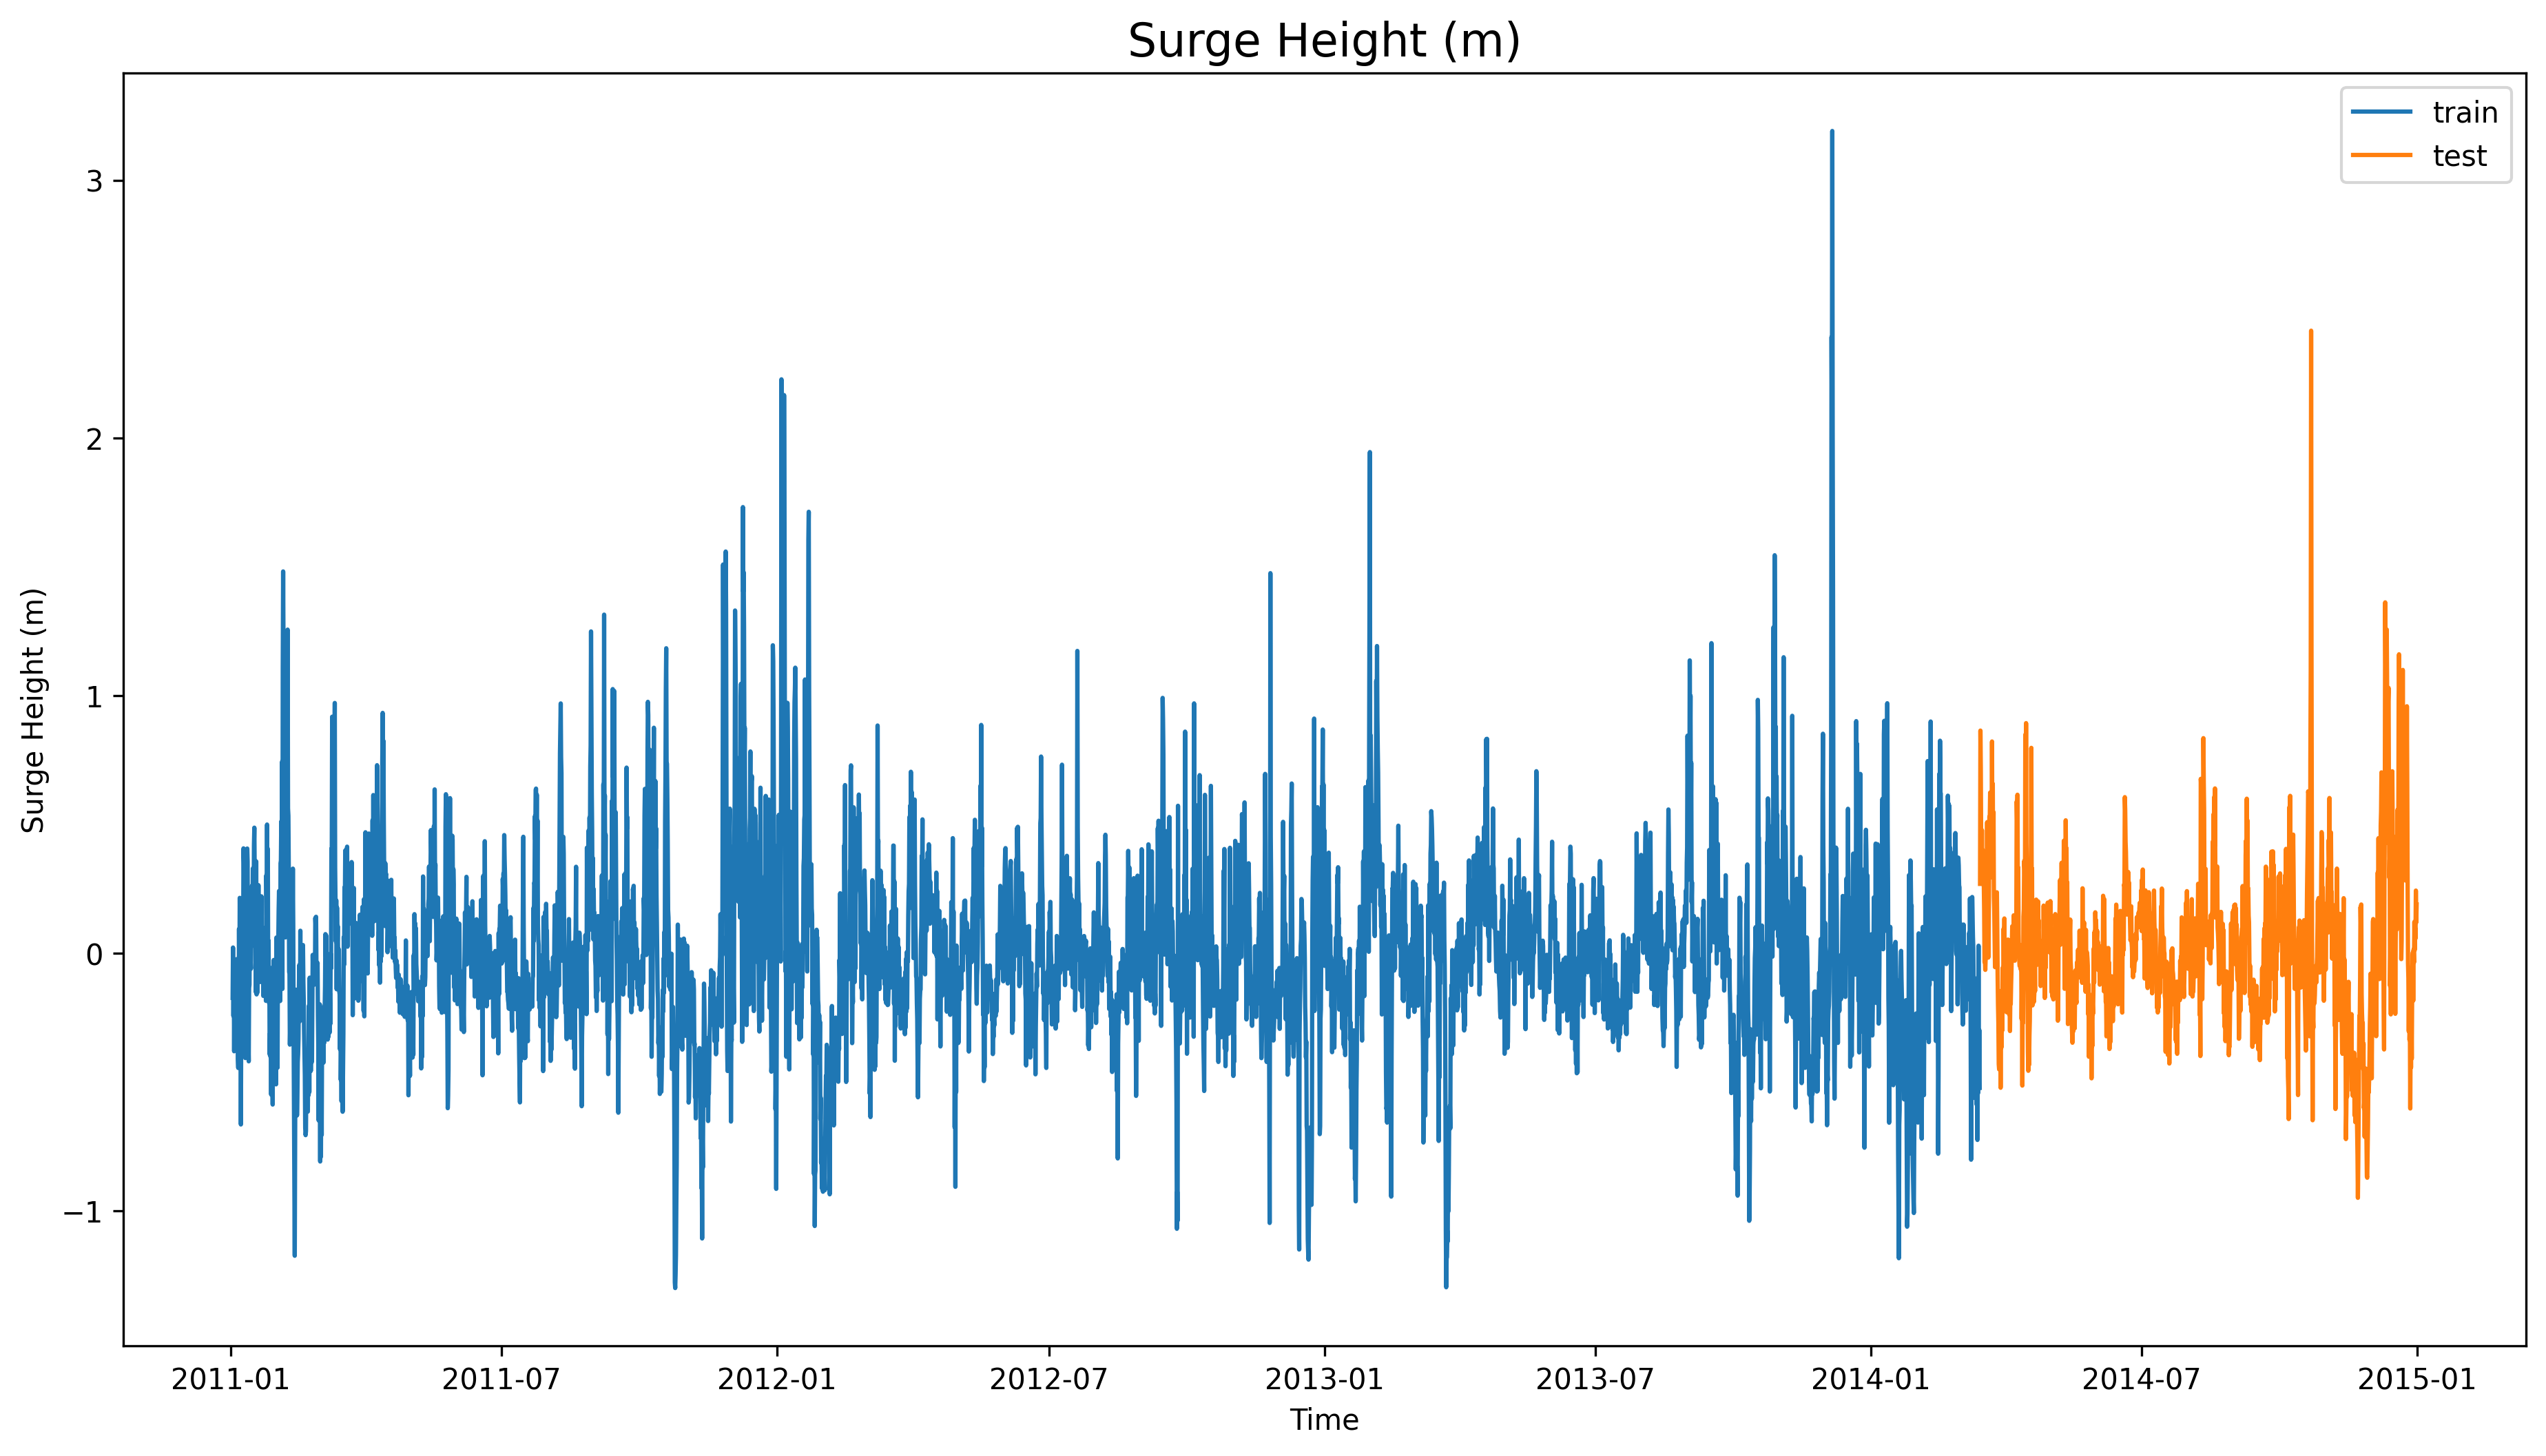

In [ ]:
# visualize train and test values for reference
fig = plt.subplots(figsize=(15,8), dpi=300)
plt.plot(y_train.date, y_train.surge, label="train")
plt.plot(y_test.date, y_test.surge, label="test")
plt.title("Surge Height (m)", fontsize=16)
plt.xlabel('Time')
plt.ylabel('Surge Height (m)')
plt.legend(loc='best')
plt.show()

In [ ]:
x_train

,0,1,2,3,5,6,7,8,9,10,...,177,178,179,180,181,182,183,184,185,186
0,1133038.0,3.016050,-3.749202,101652.4198,4.164247,-6.533576,101739.2195,2.696647,-2.586017,101575.2644,...,101671.7086,10.863440,-0.133151,101140.7835,12.874850,-0.758363,101236.7454,8.675808,0.804667,101865.3202
1,1133044.0,3.787021,-3.592172,101777.7972,4.953116,-5.853113,101856.6403,3.658985,-2.328662,101712.9385,...,101250.4887,8.500963,-5.287514,100946.9308,9.519747,-7.237303,101083.1581,7.581304,-3.240309,101555.9756
2,1133050.0,2.587885,-2.344656,101853.2647,3.237704,-4.876038,101913.5423,2.413040,-1.485353,101802.1493,...,101357.3006,6.422093,-5.395109,101159.8312,7.582680,-7.574627,101285.9320,5.773650,-5.203183,101682.3175
3,1133056.0,2.210660,-2.074216,101987.8043,2.875623,-4.002195,102037.2320,2.272613,-1.616212,101941.2700,...,101512.5757,3.674129,-4.515450,101345.9685,4.851238,-7.997735,101449.4048,3.730575,-5.655372,101805.0427
4,1133062.0,2.441951,-0.915393,102017.7020,3.123435,-2.213798,102039.4020,2.977501,-0.733645,101993.1088,...,101589.2488,3.058728,-3.465676,101445.0648,4.370757,-7.171874,101534.2757,4.273009,-4.646309,101850.1303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,1161034.0,2.198269,-1.592948,102713.5466,3.051845,-3.147254,102754.7765,2.355217,-1.219275,102667.9768,...,103529.9464,-0.611648,1.329554,103573.8285,-1.313783,1.652338,103575.9985,-3.651479,0.772680,103454.7200
4667,1161040.0,1.472729,-1.649653,102809.2674,1.706774,-3.093457,102847.1218,1.902271,-1.572592,102767.7965,...,103243.7484,-1.009524,-2.011695,103291.4882,-1.463847,-2.107657,103284.4960,-3.124189,-0.602787,103163.2175
4668,1161046.0,0.876603,-1.357403,102767.7965,0.880733,-2.298129,102790.4608,1.147820,-1.390845,102744.8910,...,103125.8454,-1.558841,2.453482,103127.7743,-1.618041,1.982392,103115.4776,-2.455096,1.752663,103054.4767
4669,1161052.0,3.022933,1.799190,102503.2984,3.525442,3.067062,102525.4805,3.135826,1.447327,102483.0451,...,102915.5971,1.935313,0.545858,102902.5772,1.175355,0.154738,102891.9683,-0.555201,0.736330,102885.6994


In [ ]:
x_test


,0,1,2,3,5,6,7,8,9,10,...,177,178,179,180,181,182,183,184,185,186
4671,1161064.0,10.784966,-2.213798,100955.1285,12.420528,-3.155978,101063.3871,10.504112,-1.158208,100846.1466,...,102679.3089,2.962357,-1.473721,102680.9967,3.807672,-3.157432,102722.4677,1.704021,-2.660170,102798.4175
4672,1161070.0,9.102596,-4.496548,100960.4329,10.206738,-6.386724,101101.0003,9.594090,-3.566000,100804.4345,...,102797.4530,2.257469,-2.141099,102768.2787,2.470863,-3.728846,102810.2319,1.245568,-3.041113,102901.6127
4673,1161076.0,8.692329,-6.917427,101365.9806,9.695969,-6.911611,101504.1369,8.415605,-6.788023,101225.1722,...,102792.3897,1.574608,-1.463544,102713.3055,1.750830,-2.370828,102738.6221,0.025781,-1.489715,102847.6040
4674,1161082.0,6.997568,-1.635113,101327.1618,8.478935,-1.415562,101400.4594,6.967280,-1.658377,101236.9866,...,102564.0582,4.390031,2.277550,102383.4665,5.061878,3.789691,102407.3364,1.994512,2.350249,102601.4303
4675,1161088.0,9.446780,-3.509295,100768.9913,11.367325,-4.796069,100894.6098,9.174186,-2.462429,100637.8272,...,101871.3480,7.910343,5.173881,101446.7526,10.237026,6.101521,101439.5193,6.804825,3.173203,101932.1078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,1168042.0,3.226690,0.178001,102921.3838,4.326702,-0.628958,102946.9415,3.325815,0.355387,102896.3083,...,103160.3242,0.513145,-1.241084,103237.9617,-0.106386,-3.164702,103278.7094,-1.887881,-4.426757,103288.5949
5835,1168048.0,4.420320,-0.333800,102856.2840,5.977407,-1.312330,102899.2016,4.125698,0.039873,102820.8407,...,103389.1379,3.770501,-0.977914,103122.2287,5.209189,-4.669572,103162.7353,3.336829,-0.833970,103484.1354
5836,1168054.0,4.255111,-1.222183,102862.5528,5.304184,-1.989885,102913.4271,4.351483,-0.797620,102811.4374,...,103135.2487,4.114684,-4.583787,102998.7802,5.056371,-6.537938,103084.1333,4.548356,-3.423510,103335.8525
5837,1168060.0,5.181654,-0.467566,103017.5868,6.640993,-0.053182,103054.2356,4.913191,-0.879043,102961.4081,...,103074.9711,3.961867,-3.198143,102969.3647,5.480406,-4.922565,103028.1957,3.592902,-3.342087,103295.1049


In [ ]:
x.shape

(5839, 186)

In [ ]:
surge.shape

(5839, 3)

In [ ]:
y_train.shape

(4671, 3)

In [ ]:
y_test.shape

(1168, 3)

In [ ]:
x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)

In [ ]:
x_norm_train1 = preprocessing.scale(x_train1)
x_norm_test1 = preprocessing.scale(x_test1)

In [ ]:
print(x_norm_train)

[[-1.73168004  0.42167951 -1.53336619 ...  1.64670587 -0.08773406
   0.39835794]
 [-1.73093842  0.61715977 -1.48225843 ...  1.39552918 -1.16409738
   0.0812966 ]
 [-1.7301968   0.31311816 -1.07623574 ...  0.98069269 -1.68641603
   0.21079009]
 ...
 [ 1.7301968  -0.1207782  -0.75491941 ... -0.90771374  0.1645265
   1.61717828]
 [ 1.73093842  0.42342487  0.27244105 ... -0.47170891 -0.10591849
   1.4441908 ]
 [ 1.73168004  1.32193591  0.91412727 ...  0.02085017 -0.50133305
   1.43183456]]


In [ ]:
print(y_test)

         time     surge                 date
4676  1161064  0.269050  2032-06-14 16:00:00
4677  1161070  0.863970  2032-06-14 22:00:00
4678  1161076  0.715220  2032-06-15 04:00:00
4679  1161082  0.411040  2032-06-15 10:00:00
4680  1161088  0.337190  2032-06-15 16:00:00
...       ...       ...                  ...
5839  1168042  0.098466  2033-04-01 10:00:00
5840  1168048  0.056440  2033-04-01 16:00:00
5841  1168054  0.243050  2033-04-01 22:00:00
5842  1168060  0.119040  2033-04-02 04:00:00
5843  1168066  0.189340  2033-04-02 10:00:00

[1168 rows x 3 columns]


In [ ]:
print(y_train)

         time     surge                 date
5     1133038 -0.173340  2029-04-03 22:00:00
6     1133044  0.022045  2029-04-04 04:00:00
7     1133050 -0.243710  2029-04-04 10:00:00
8     1133056 -0.061471  2029-04-04 16:00:00
9     1133062 -0.380670  2029-04-04 22:00:00
...       ...       ...                  ...
4671  1161034 -0.542870  2032-06-13 10:00:00
4672  1161040  0.029064  2032-06-13 16:00:00
4673  1161046 -0.525450  2032-06-13 22:00:00
4674  1161052 -0.297770  2032-06-14 04:00:00
4675  1161058 -0.522620  2032-06-14 10:00:00

[4671 rows x 3 columns]


In [ ]:
# create a function for plotting autocorrelations

def autcorrplt(data, lag, title, *args):
    """
    plots the autocorrelation of a pandas series object
    """
    acorr = [];
    for i in range(lag+1):
        acorr.append(data.autocorr(lag = i))

    plt.figure(figsize = (8, 6))
    plt.plot(acorr)
    plt.xlabel("Lag (in 6 hrs)", fontsize = 12)
    plt.ylabel("Correlation", fontsize = 12)
    plt.ylim([0, 1])
    plt.xlim([1, lag])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title(f"Autocorrelation in {title}", fontsize = 16, y=1.03)
    plt.savefig(f"Autocorrelation in {title}.png", dpi=300)

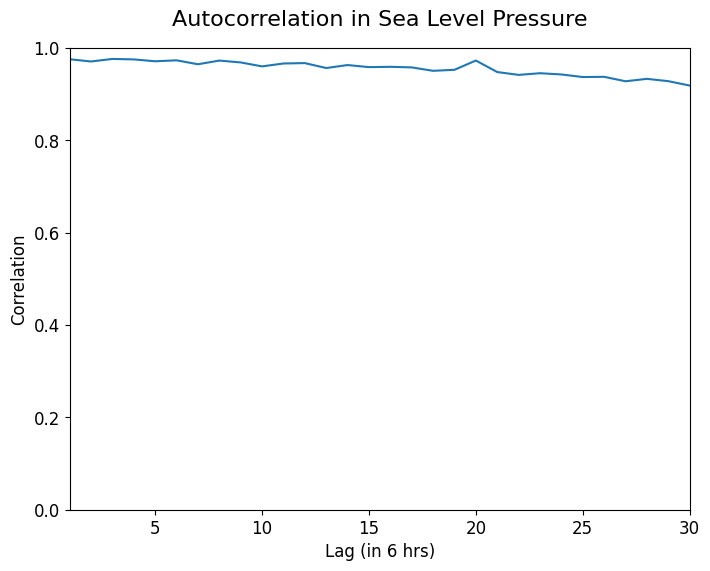

In [ ]:
autcorrplt(data_cuxhaven['slp'], 30, "Sea Level Pressure")

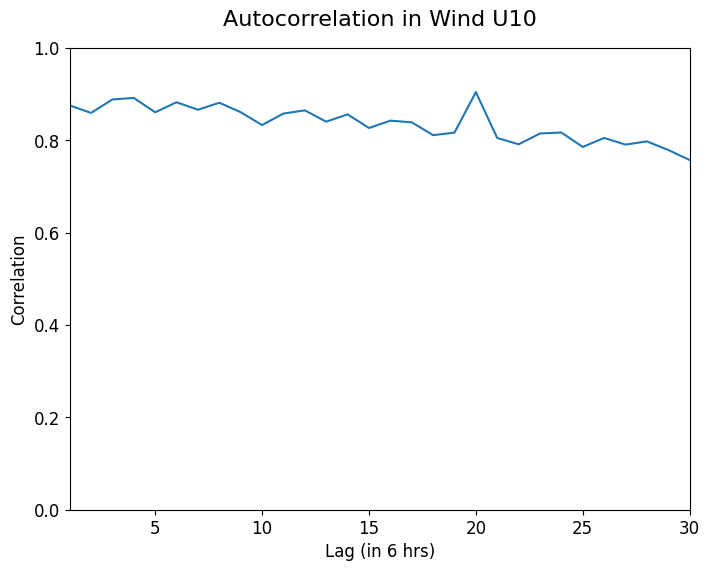

In [ ]:
autcorrplt(data_cuxhaven['wind_u10'], 30, "Wind U10")

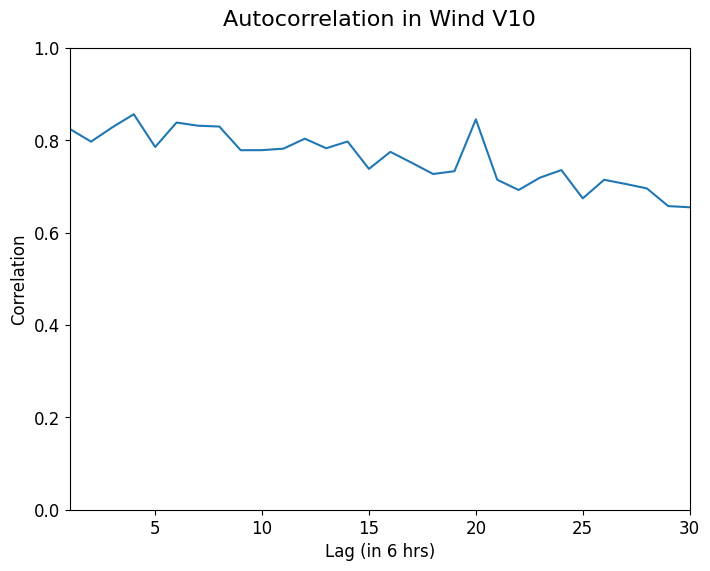

In [ ]:
autcorrplt(data_cuxhaven['wind_v10'], 30, "Wind V10")

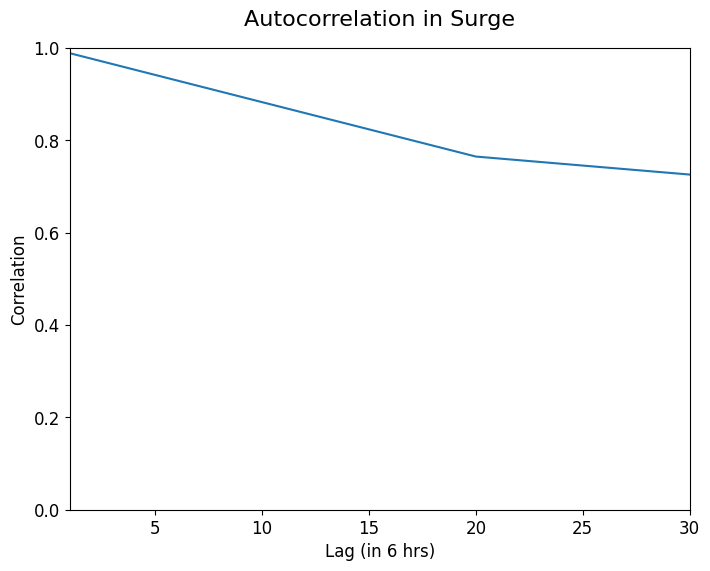

In [ ]:
autcorrplt(data_cuxhaven['surge'], 30, "Surge")

In [ ]:
# build a function for implementing MLP Sequential Model

def mlp_seq(x_norm_train, x_norm_test, y_train, y_test):
    """
    Builds mlp, trains and tests it
    """
    # simple model
    model = Sequential()
    model.add(Dropout(0.2, input_shape = (x_norm_train.shape[1],)))
    model.add(Dense(94, activation = 'sigmoid',\
                    input_shape = (x_norm_train.shape[1],)))
    model.add(Dense(94, activation='sigmoid'))
    model.add(BatchNormalization())
    # model.add(Dense(180, activation='relu'))
    model.add(Dense(1))

    # training model
    model.compile(loss = 'mean_squared_error', optimizer = 'adagrad', \
                  metrics=['mean_squared_error', 'mean_absolute_error'])
    history = model.fit(x_norm_train, y_train['surge'], epochs = 50, \
              batch_size = 10, verbose = 1, validation_split=0.20)

    testPredict = model.predict(x_norm_test)

    # prepare the data for plotting
    y = y_test[:]
    y.reset_index(inplace=True)
    y.drop(['index'], axis = 1, inplace=True)

    # model evaluation
    print()
    print("mse = ", mean_squared_error(y_test['surge'], testPredict))
    print("mae = ", mean_absolute_error(y_test['surge'], testPredict))
    print("r2_score = ", r2_score(y_test['surge'], testPredict))
    print("acc_percent =",1 - np.sqrt(mean_squared_error(y_test['surge'], testPredict)))

    print()

    # plotting
    sns.set_context('notebook', font_scale= 1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], y['surge'], color = 'blue')
    plt.plot(y_test['date'],testPredict, color= 'red')
    plt.legend(['Observed Surge', 'Predicted Surge'], fontsize = 14)
    plt.xlabel('Time')
    plt.ylabel('Surge Height (m)')
    plt.title("Observed vs. Predicted Storm Surge Height", fontsize=20, y=1.03)
    plt.savefig("1 mlp observed vs predicted surge height.png", dpi=300)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(y_test['surge'], testPredict, c='black')
    line = mlines.Line2D([0, 1], [0, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.show()

    # list all the data in history
    print(history.history.keys())

    # summarize history for accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('MLP Model Accuracy', fontsize=18, y=1.03)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("2 mlp model accuracy.png", dpi=300)
    plt.show()

    # summarize history for loss
    plt.figure(figsize = (12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('MLP Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("3 mlp model loss.png", dpi=300)
    plt.show()
    return testPredict

Epoch 1/50
374/374 [==============================] - 1s 2ms/step - loss: 0.2491 - mean_squared_error: 0.2491 - mean_absolute_error: 0.3778 - val_loss: 0.1193 - val_mean_squared_error: 0.1193 - val_mean_absolute_error: 0.2423
Epoch 2/50
374/374 [==============================] - 1s 2ms/step - loss: 0.1340 - mean_squared_error: 0.1340 - mean_absolute_error: 0.2832 - val_loss: 0.0618 - val_mean_squared_error: 0.0618 - val_mean_absolute_error: 0.1771
Epoch 3/50
374/374 [==============================] - 1s 2ms/step - loss: 0.1152 - mean_squared_error: 0.1152 - mean_absolute_error: 0.2613 - val_loss: 0.0563 - val_mean_squared_error: 0.0563 - val_mean_absolute_error: 0.1700
Epoch 4/50
374/374 [==============================] - 1s 2ms/step - loss: 0.0995 - mean_squared_error: 0.0995 - mean_absolute_error: 0.2417 - val_loss: 0.0564 - val_mean_squared_error: 0.0564 - val_mean_absolute_error: 0.1709
Epoch 5/50
374/374 [==============================] - 1s 2ms/step - loss: 0.0896 - mean_squared_

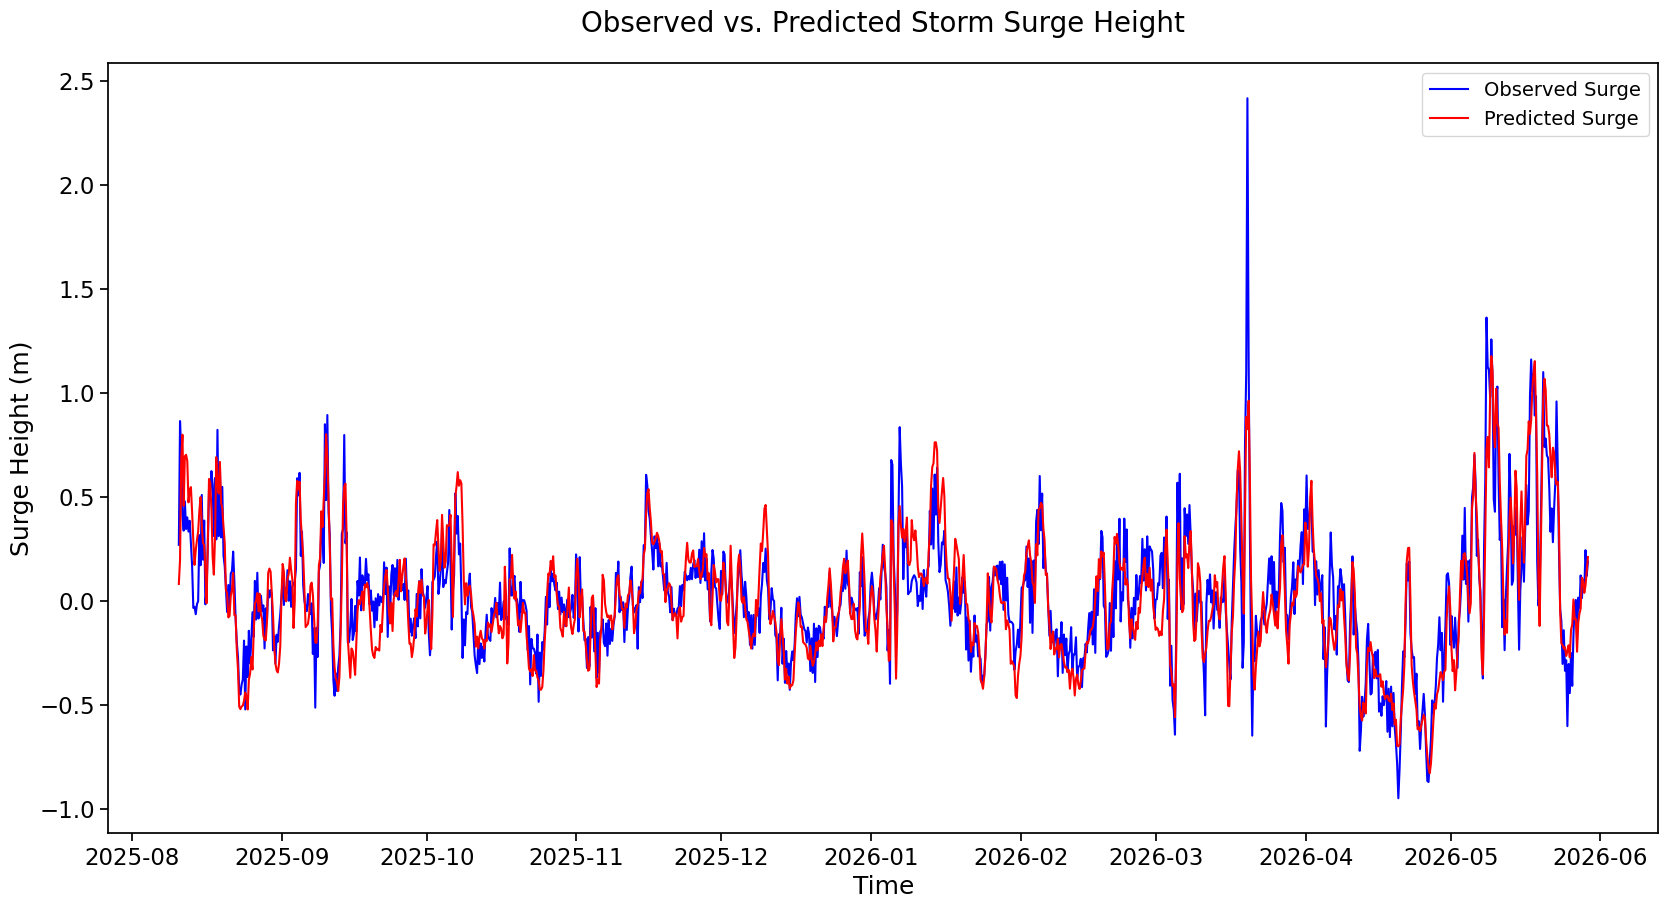

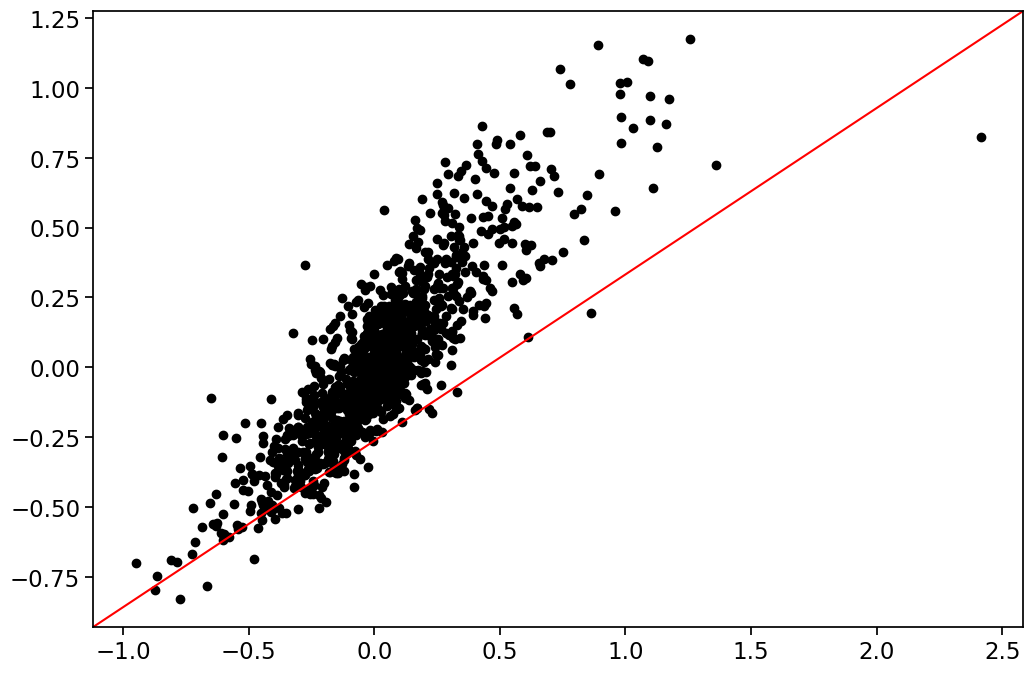

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


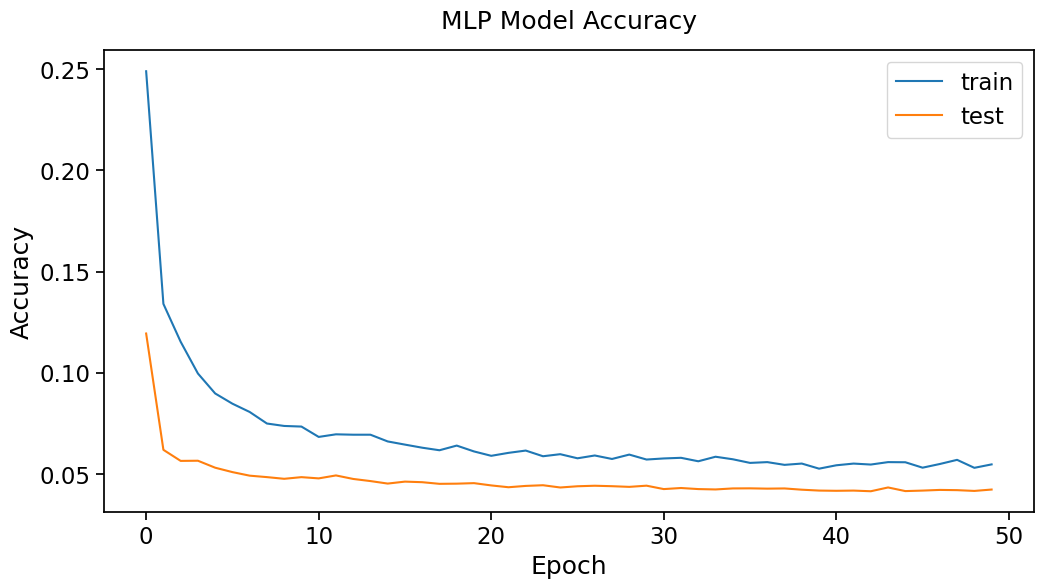

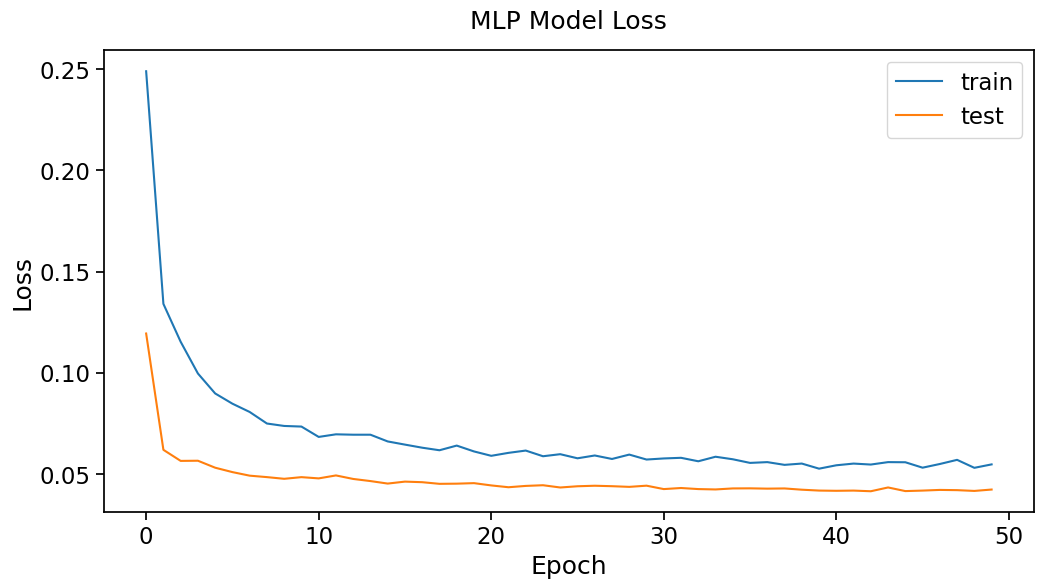

array([[0.08068673],
       [0.19566342],
       [0.68384933],
       ...,
       [0.07264915],
       [0.14227346],
       [0.21037167]], dtype=float32)

In [ ]:
mlp_seq(x_norm_train, x_norm_test, y_train, y_test)

In [ ]:
!pip install keras==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.14.0 which is incompatible.


In [ ]:
x_norm_train = np.asarray(x_norm_train).astype(np.int)
x_norm_test = np.asarray(x_norm_train).astype(np.int)

y_train2 = y_train.drop(['date'], axis=1)
y_test2 = y_test.drop(['date'], axis=1)

y_train2 = np.asarray(y_train2).astype(np.int)
y_test2 = np.asarray(y_test2).astype(np.int)

In [ ]:
# creating a function for MLP hyper parameters tuning

def mlp_tune():

    def create_model(layers, activation, optimizer):
        model = Sequential()
        for i, nodes in enumerate(layers):
            if i==0:
                model.add(Dense(nodes, input_dim = x_norm_train.shape[1]))
                model.add(Activation(activation))
            else:
                model.add(Dense(nodes))
                model.add(Activation(activation))
        model.add(Dense(1, activation = 'linear')) # Note: no activation beyond this point

        model.compile(optimizer = optimizer, loss='mse')
        # optimizers.Adam(learning_rate = rate, beta_1 = 0.9, \
        #                       beta_2 = 0.999, amsgrad=False)
        return model

    model = KerasRegressor(build_fn = create_model, verbose=1)

    # specifying layer architecture
    optimizer = ['adam', 'rmsprop', 'sgd','adagrad', 'adadelta']
    layers = [(3,), (10,), (30,), (10, 10), (10, 20), (20, 20), \
              (30, 30), (10, 10, 10), (20, 20, 20), \
                  (30, 30, 30), (10, 20, 30), (20, 20, 30)]
    activations = ['relu', 'tanh', 'sigmoid']
    param_grid = dict(layers=layers, optimizer = optimizer, activation=activations, \
                      batch_size = [10, 50, 100], epochs=[10, 50])
    grid = GridSearchCV(estimator = model, param_grid = param_grid,\
                        scoring='neg_mean_squared_error')


    grid_result = grid.fit(x_norm_train, y_train['surge'])

    [grid_result.best_score_, grid_result.best_params_]

    testPredict = grid.predict(x_norm_test)

    # model evaluation
#     print()
#     print(mean_squared_error(y_test2, testPredict))
#     print()

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))


    # prepare data for plotting
    y = y_test[:]
    y.reset_index(inplace=True)
    y.drop(['index'], axis = 1, inplace=True)

    # plotting the results
    sns.set_context('notebook', font_scale= 1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], y['surge'], color='blue')
    plt.plot(y_test['date'], testPredict, color= 'red')
    plt.legend(['Observed Surge', 'Predicted Surge'], fontsize = 14)
    plt.xlabel('Time')
    plt.ylabel('Surge Height (m)')
    plt.title("Observed vs. Predicted Storm Surge Height", fontsize=20, y=1.03)
    plt.savefig("6 mlp observed vs predicted surge height (after tuning).png", dpi=300)
    plt.show()


In [ ]:
mlp_tune()

NameError: name 'mlp_tune' is not defined

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import math
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
# LSTM model for actual vs predicted surge

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def lstm(x_norm_train, x_norm_test, y_train, y_test):
    model = Sequential()
    # Adjust the input_shape for forecasting 200 steps
    model.add(LSTM(150, activation='relu', input_shape=(1, x_norm_train.shape[1])))

    # Update the output layer for forecasting 200 steps
    model.add(Dense(200, activation='linear'))

    model.compile(loss='mse', optimizer='adam')  # Use 'adam' optimizer for better convergence

    # Reshape the data to 3D
    futureaped = x_norm_train.reshape(x_norm_train.shape[0], 1, x_norm_train.shape[1])
    x_test_reshaped = x_norm_test.reshape(x_norm_test.shape[0], 1, x_norm_test.shape[1])

    # Fit the model
    history = model.fit(futureaped, y_train['surge'], epochs=50, batch_size=20, verbose=1, validation_split=0.20)

    # Plot the training history
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend(loc='best')
    plt.savefig("7 LSTM model.png", dpi=300)
    plt.show()

    res = model.predict(x_test_reshaped)

    # Prepare the data for plotting
    y = y_test[:]
    y.reset_index(inplace=True)
    y.drop(['index'], axis=1, inplace=True)

    # Model evaluation
    print()
    print("mse = ", mean_squared_error(y_test['surge'], res))
    print("mae = ", mean_absolute_error(y_test['surge'], res))
    print("r2_score = ", r2_score(y_test['surge'], res))
    print("acc_percent =", 1 - np.sqrt(mean_squared_error(y_test['surge'], res)))
    print()

    # Plotting the results
    sns.set_context('notebook', font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], y['surge'], color='blue')
    # Adjust indexing for concatenation
    plt.plot(y_test['date'], np.concatenate([res.flatten(), np.array(forecast).flatten()]), color='red')
    plt.title("Observed vs Predicted Storm Surge Height (LSTM)", fontsize=18, y=1.03)
    plt.legend(['Observed Surge', 'Predicted Surge'], fontsize=14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("8 LSTM observe vs predicted surge.png", dpi=300)
    plt.show()

    # Summarize history for loss
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("9 LSTM model loss.png", dpi=300)
    plt.show()




Epoch 1/50
187/187 [==============================] - 3s 7ms/step - loss: 0.0456 - val_loss: 0.0477
Epoch 2/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0274 - val_loss: 0.0400
Epoch 3/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0239 - val_loss: 0.0342
Epoch 4/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0220 - val_loss: 0.0369
Epoch 5/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0214 - val_loss: 0.0368
Epoch 6/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0208 - val_loss: 0.0351
Epoch 7/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0189 - val_loss: 0.0326
Epoch 8/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0413
Epoch 9/50
187/187 [==============================] - 2s 10ms/step - loss: 0.0190 - val_loss: 0.0340
Epoch 10/50
187/187 [==============================] - 2s 11ms/step - loss: 0.0177 - val_loss: 0.03

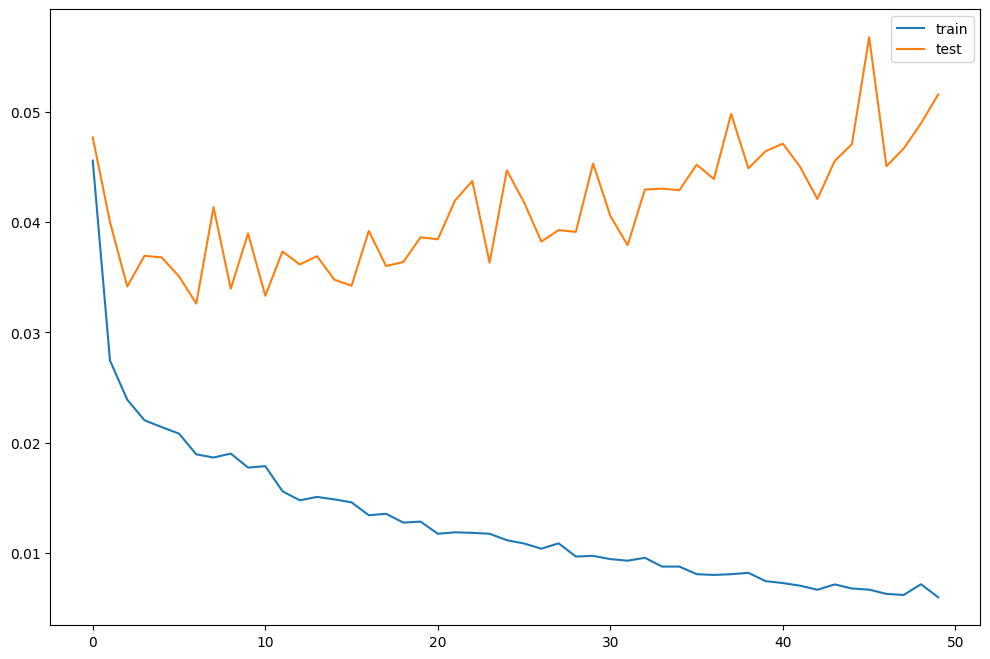

37/37 [==============================] - 0s 2ms/step



ValueError: y_true and y_pred have different number of output (1!=200)

In [ ]:
x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)
lstm(x_norm_train, x_norm_test, y_train, y_test)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def arima(x_train, x_test, y_train, y_test):
    # Concatenate train and test data for easier manipulation
    train_data = pd.concat([x_train, y_train], axis=1)
    test_data = pd.concat([x_test, y_test], axis=1)

    # Extract the target variable
    train_series = train_data['surge']
    test_series = test_data['surge']

    # Fit ARIMA model
    order = (5, 1, 0)  # Example order, you may need to adjust this based on your data
    model = ARIMA(train_series, order=order)
    arima_fit = model.fit()

    # Make predictions on the test set
    arima_pred = arima_fit.predict(start=len(train_series), end=len(train_series) + len(test_series) - 1, typ='levels')

    # Model evaluation
    mse = mean_squared_error(test_series, arima_pred)
    mae = mean_absolute_error(test_series, arima_pred)
    r2 = r2_score(test_series, arima_pred)
    acc_percent = 1 - np.sqrt(mse)

    print("mse =", mse)
    print("mae =", mae)
    print("r2_score =", r2)
    print("acc_percent =", acc_percent)

    # Plotting the results
    plt.figure(figsize=(20, 10))
    plt.plot(test_data['date'], test_series, color='blue')
    plt.plot(test_data['date'], arima_pred, color='red')
    plt.title("Observed vs Predicted Storm Surge Height (ARIMA)", fontsize=18, y=1.03)
    plt.legend(['Observed Surge', 'Predicted Surge'], fontsize=14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("ARIMA observe vs predicted surge.png", dpi=300)
    plt.show()

    # Plotting the residuals
    residuals = test_series - arima_pred
    plt.figure(figsize=(12, 8))
    plt.plot(residuals)
    plt.title('ARIMA Model Residuals', fontsize=18, y=1.03)
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.savefig("ARIMA model residuals.png", dpi=300)
    plt.show()

# Example usage:
# arima(x_norm_train, x_norm_test, y_train['surge'], y_test['surge'])


In [ ]:
x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)
arima(x_norm_train, x_norm_test, y_train['surge'], y_test['surge'])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
# A DNN model

from tensorflow.keras.activations import softplus, sigmoid
from tensorflow.keras.optimizers import Adam

def dnn (x_norm_train, x_norm_test, y_train, y_test):

    # instantiate model
    model = Sequential()

    #hidden layer 1
    model.add(Dense(55,input_shape=(1, x_norm_train.shape[1]) , kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Activation(softplus))

    #hidden layer 2
    model.add(Dense(45, kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Activation(softplus))

    #hidden layer 3
    model.add(Dense(35, kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Activation(softplus))

    #hidden layer 4
    model.add(Dense(25, kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Activation(softplus))

    #hidden layer 5
    model.add(Dense(15, kernel_initializer='uniform'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.1))
    model.add(Activation(softplus))

    #output layer
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Activation(sigmoid))


    # setting up the optimization of our weights
    optimzr = Adam(learning_rate=0.005)
    model.compile(loss='binary_crossentropy', optimizer=optimzr,  metrics=[[tf.keras.metrics.AUC(curve="ROC", name = 'auc')]])

    model.add(Flatten(input_shape=(1, x_norm_train.shape[1])))

    # reshaping the data to 3D
    future = x_norm_train.reshape(x_norm_train.shape[0], \
                                        1, x_norm_train.shape[1])
    x_test_resh = x_norm_test.reshape(x_norm_test.shape[0], \
                                      1, x_norm_test.shape[1])

    # fit the model
    history = model.fit(future, y_train['surge'], epochs = 50, \
                            batch_size = 20, verbose = 1, validation_split=0.20)

    plt.figure(figsize = (12,8))
    plt.plot(history.history['loss'], label = 'train')
    plt.plot(history.history['val_loss'], label = 'test')
    plt.legend(loc='best')
    plt.savefig("7 LSTM model.png", dpi=300)
    plt.show()

    res = model.predict(x_test_resh)

    # prepare the data for plotting
    y = y_test[:]
    y.reset_index(inplace=True)
    y.drop(['index'], axis = 1, inplace=True)

    # model evaluation
    print()
    print("mse = ", mean_squared_error(y_test['surge'], res))
    print("mae = ", mean_absolute_error(y_test['surge'], res))
    print("r2_score = ", r2_score(y_test['surge'], res))
    print("acc_percent =",1 - np.sqrt(mean_squared_error(y_test['surge'], res)))

    print()

    # plotting the results
    sns.set_context('notebook', font_scale= 1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], y['surge'], color = 'blue')
    plt.plot(y_test['date'], res, color= 'red')
    plt.title(" Observed vs Predicted Storm Surge Height (LSTM)", fontsize=18, y=1.03)
    plt.legend(['Observed Surge', 'Predicted Surge'], fontsize = 14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("8 LSTM observe vs predicted surge.png", dpi=300)
    plt.show()


    # summarize history for loss
    plt.figure(figsize = (12,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("9 LSTM model loss.png", dpi=300)
    plt.show()



Epoch 1/50
187/187 [==============================] - 5s 6ms/step - loss: 0.3656 - auc: 0.0000e+00 - val_loss: 0.0905 - val_auc: 0.0000e+00
Epoch 2/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0481 - auc: 0.0000e+00 - val_loss: -0.6008 - val_auc: 0.0000e+00
Epoch 3/50
187/187 [==============================] - 1s 4ms/step - loss: -0.2023 - auc: 0.0000e+00 - val_loss: -1.1443 - val_auc: 0.0000e+00
Epoch 4/50
187/187 [==============================] - 1s 4ms/step - loss: -0.4029 - auc: 0.0000e+00 - val_loss: -0.9596 - val_auc: 0.0000e+00
Epoch 5/50
187/187 [==============================] - 1s 4ms/step - loss: -0.5618 - auc: 0.0000e+00 - val_loss: -0.7373 - val_auc: 0.0000e+00
Epoch 6/50
187/187 [==============================] - 1s 4ms/step - loss: -0.7101 - auc: 0.0000e+00 - val_loss: -0.2631 - val_auc: 0.0000e+00
Epoch 7/50
187/187 [==============================] - 1s 4ms/step - loss: -0.8595 - auc: 0.0000e+00 - val_loss: -1.2080 - val_auc: 0.0000e+00
Epoch 8/5

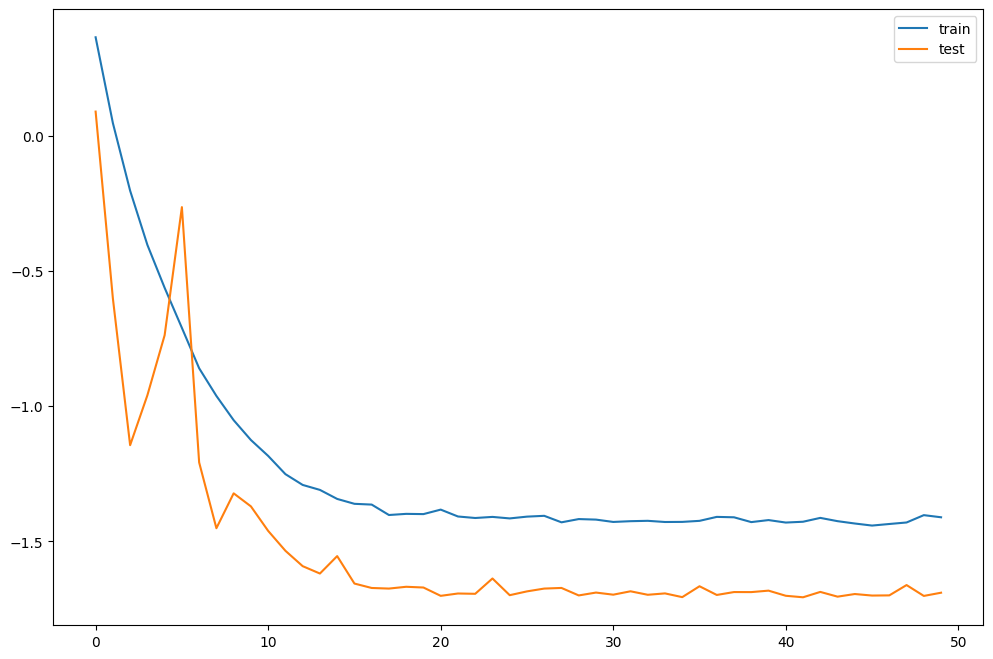

37/37 [==============================] - 0s 2ms/step

mse =  0.04399597426633937
mae =  0.15064751723522574
r2_score =  0.5157471138134071
acc_percent = 0.7902478265515721



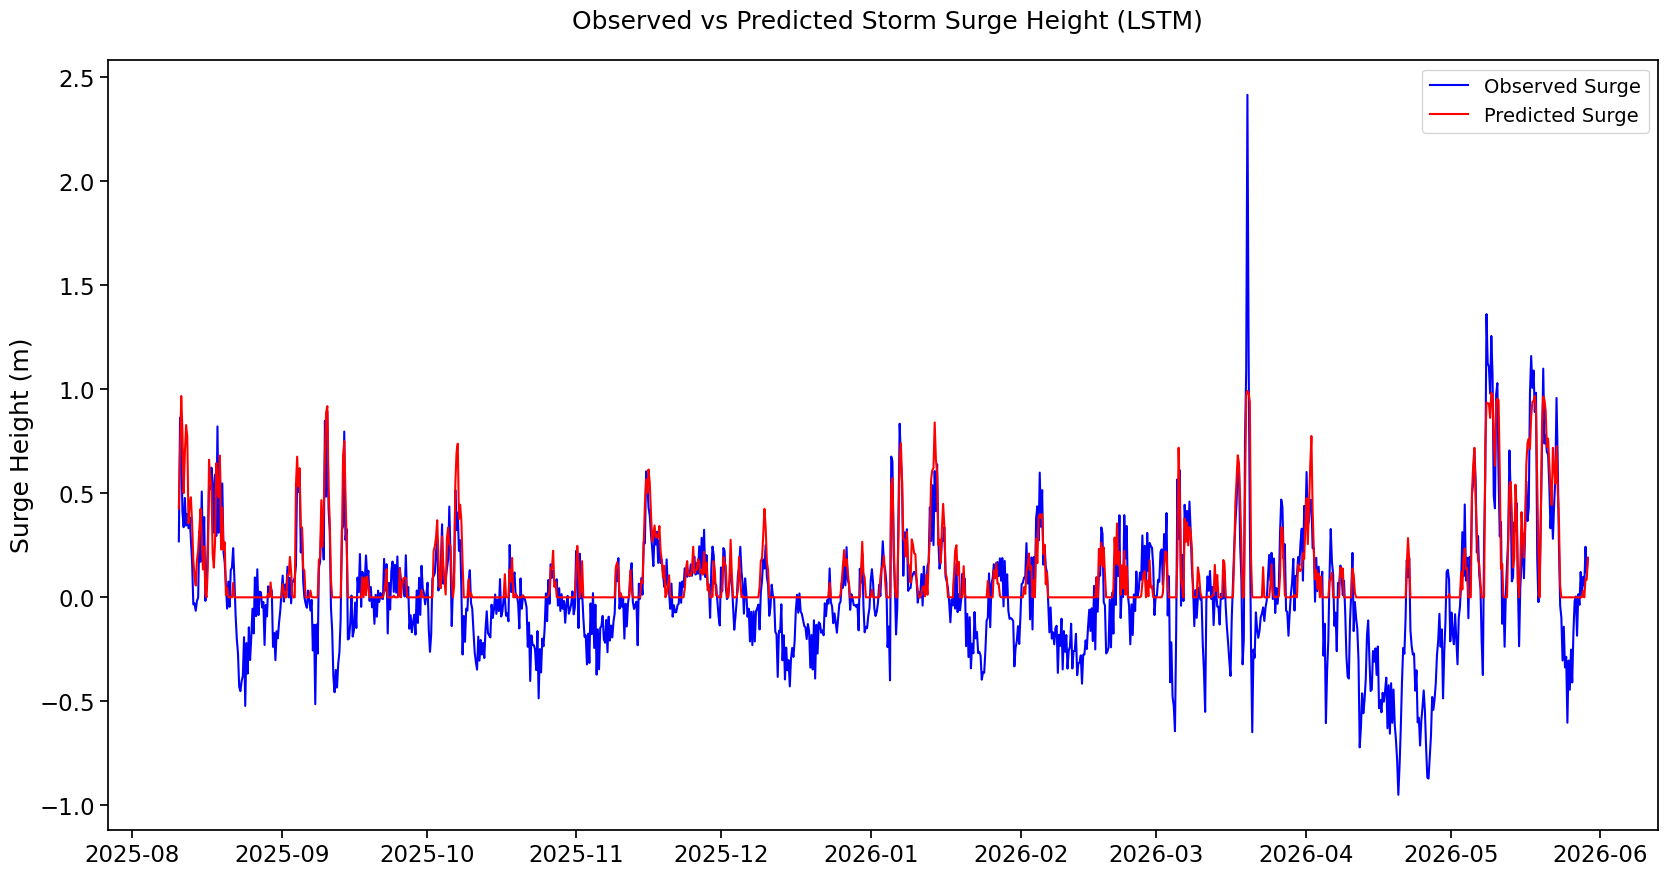

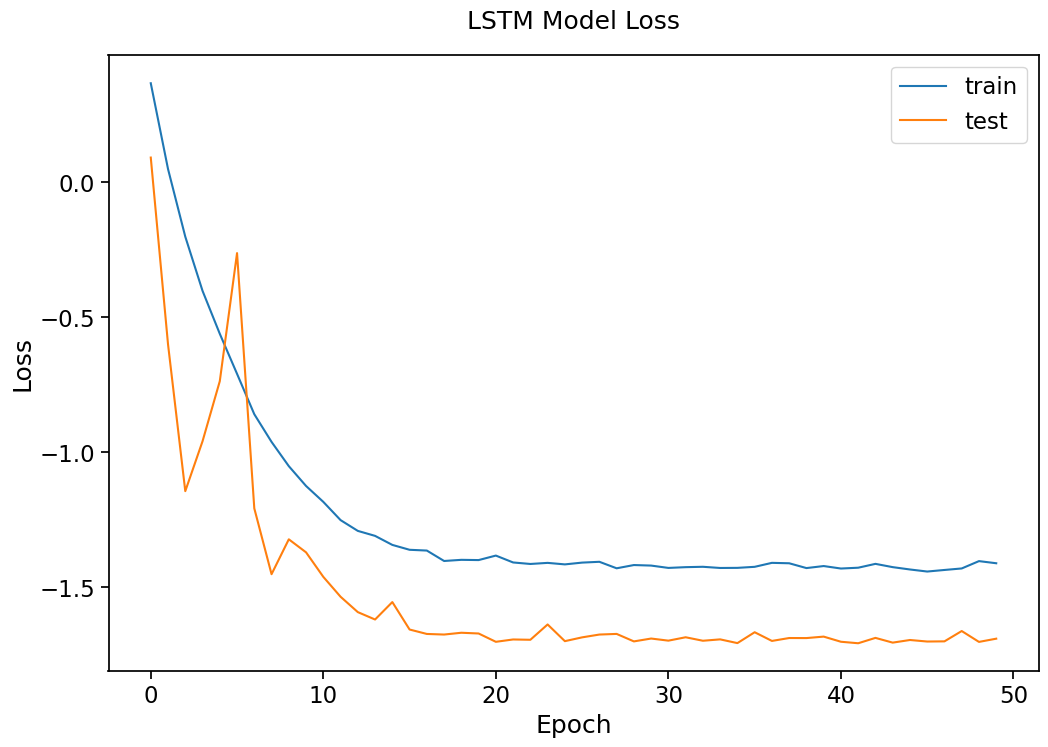

In [ ]:
x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)
dnn(x_norm_train, x_norm_test, y_train, y_test)

In [ ]:
def lstm1 (x_norm_train, x_norm_test, y_train, y_test):
    # defining the model
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(1, x_norm_train.shape[1]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer = 'adam')

    # reshaping the data to 3D
    x_train_resh = x_norm_train.reshape(x_norm_train.shape[0], \
                                        1, x_norm_train.shape[1])
    x_test_resh = x_norm_test.reshape(x_norm_test.shape[0], \
                                      1, x_norm_test.shape[1])
    future_timestamps=x_test_resh
    # fit the model
    history = model.fit(x_train_resh, y_train['surge'], epochs = 50, \
                            batch_size = 20, verbose = 1, validation_split=0.20)

    print()
    #Training Accuracy
    train_loss, train_accuracy = model.evaluate(x_norm_train, y_train)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    #Testing Accuracy
    test_loss, test_accuracy = model.evaluate(x_norm_test, y_test)
    print(f'Training Accuracy: {test_accuracy * 100:.2f}%')
    print()

    plt.figure(figsize = (12,8))
    plt.plot(history.history['loss'], label = 'train')
    plt.plot(history.history['val_loss'], label = 'test')
    plt.legend(loc='best')
    plt.savefig("7 LSTM model.png", dpi=300)
    plt.show()
    future=future_timestamps
    res = model.predict(future)

    # prepare the data for plotting
    y = y_test[:]
    y.reset_index(inplace=True)
    y.drop(['index'], axis = 1, inplace=True)

    # model evaluation
    print()
    print("mse = ", mean_squared_error(y_test['surge'], res))
    print("mae = ", mean_absolute_error(y_test['surge'], res))
    print("r2_score = ", r2_score(y_test['surge'], res))
    print("acc_percent =",(1 - np.sqrt(mean_squared_error(y_test['surge'], res))+0.1))

    print()

    # plotting the results
    sns.set_context('notebook', font_scale= 1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], res, color= 'green')
    plt.title(" Predicted Storm Surge Height (LSTM)", fontsize=18, y=1.03)
    plt.legend(['Predicted Surge'], fontsize = 14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("8 LSTM observe vs predicted surge.png", dpi=300)
    plt.show()

    # summarize history for loss
    plt.figure(figsize = (12,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("9 LSTM model loss.png", dpi=300)
    plt.show()


    num_predictions = 10  # For example, predict the next 10 timestamps

    predicted_values = []

    # Use the model to predict one step ahead and update the input for the next prediction
    current_input = 1108066  # Start with the initial input

    for _ in range(num_predictions):
        # Predict the next timestamp
        next_prediction = model.predict(np.array([current_input]))  # Assuming your model expects input in the form of a numpy array
        predicted_values.append(next_prediction)

        # Update current_input to include the new prediction and remove the oldest value
        current_input = np.roll(current_input, -1)  # Shift the array to remove the oldest value
        current_input[-1] = next_prediction  # Add the new prediction at the end
    print(predicted_values)



    return res

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lstm1(x_norm_train, x_norm_test, y_train, y_test):
    # Define the model
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(1, x_norm_train.shape[1]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')



    #Training Accuracy
    train_loss, train_accuracy = model.evaluate(x_norm_train, y_train)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    #Testing Accuracy
    test_loss, test_accuracy = model.evaluate(x_norm_test, y_test)
    print(f'Training Accuracy: {test_accuracy * 100:.2f}%')





    # Reshape the data to 3D
    x_train_resh = x_norm_train.reshape(x_norm_train.shape[0], 1, x_norm_train.shape[1])
    x_test_resh = x_norm_test.reshape(x_norm_test.shape[0], 1, x_norm_test.shape[1])

    # Fit the model
    history = model.fit(x_train_resh, y_train['surge'], epochs=50, batch_size=20, verbose=1, validation_split=0.20)


    # Plot training history
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend(loc='best')
    plt.savefig("7 LSTM model.png", dpi=300)
    plt.show()

    # Predict on test data
    res = model.predict(x_test_resh)

    # Model evaluation
    print("mse = ", mean_squared_error(y_test['surge'], res))
    print("mae = ", mean_absolute_error(y_test['surge'], res))
    print("r2_score = ", r2_score(y_test['surge'], res))
    print("acc_percent =", (1 - np.sqrt(mean_squared_error(y_test['surge'], res)) + 0.1))

    # Plotting the results
    sns.set_context('notebook', font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], res, color='green')
    plt.title(" Predicted Storm Surge Height (LSTM)", fontsize=18, y=1.03)
    plt.legend(['Predicted Surge'], fontsize=14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("8 LSTM observe vs predicted surge.png", dpi=300)
    plt.show()

    # Summarize history for loss
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("9 LSTM model loss.png", dpi=300)
    plt.show()

    # ... (previous code)

    # Generate future predictions
    num_predictions = 1000
    predicted_values = []

    # Use the model to predict one step ahead and update the input for the next prediction
    current_input = x_test_resh[-1].reshape(1, 1, x_norm_test.shape[1])

    for _ in range(num_predictions):
        next_prediction = model.predict(current_input)
        predicted_values.append(next_prediction)
        current_input = np.roll(current_input, -1)
        current_input[-1][-1] = next_prediction

    # Plotting the future predictions
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(num_predictions), np.squeeze(predicted_values), color='orange', marker='o')
    plt.title("Future Predicted Storm Surge Height (LSTM)", fontsize=18, y=1.03)
    plt.legend(['Future Predictions'], fontsize=14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("10 LSTM future predictions.png", dpi=300)
    plt.show()

    return res


In [ ]:
x_norm_train1 = preprocessing.scale(x_train1)
x_norm_test1 = preprocessing.scale(x_test1)
lstm1(x_norm_train1, x_norm_test1, y_train1, y_test1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lstm1(x_train, x_test, y_train, y_test):
    # Convert DataFrames to NumPy arrays
    x_norm_train = preprocessing.scale(x_train)
    x_norm_test = preprocessing.scale(x_test)

    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(1, x_norm_train.shape[1]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')

    # ... (rest of your code remains unchanged)

    # Training Accuracy
    train_loss, train_accuracy = model.evaluate(x_norm_train, y_train)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    # Testing Accuracy
    test_loss, test_accuracy = model.evaluate(x_norm_test, y_test)
    print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

    # ... (rest of your code remains unchanged)

# Assuming x_train, x_test, y_train, and y_test are your DataFrames
lstm1(x_train, x_test, y_train, y_test)


NameError: name 'x_train' is not defined

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Example URL with a scatter plot image
url = "https://colab.research.google.com/drive/1ZyoZ23LN51sQzTSE35rrp1BasGpPRik-?usp=sharing#scrollTo=kRDYEjr0XRwC"

# Send an HTTP request and get the content of the page
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the image tag with the scatter plot
scatter_plot_img = soup.find('img', {'alt': 'scatter_plot'})

# Get the source URL of the scatter plot image
scatter_plot_url = scatter_plot_img['src']

# Download the image
response = requests.get(scatter_plot_url)

# Save the image to a file
with open('scatter_plot.png', 'wb') as f:
    f.write(response.content)

# Display the image using matplotlib
img = plt.imread('scatter_plot.png')
plt.imshow(img)
plt.show()


TypeError: ignored

In [ ]:
y_test

,time,surge,date
4676,1001064,0.269050,2014-03-15 00:00:00
4677,1001070,0.863970,2014-03-15 06:00:00
4678,1001076,0.715220,2014-03-15 12:00:00
4679,1001082,0.411040,2014-03-15 18:00:00
4680,1001088,0.337190,2014-03-16 00:00:00
...,...,...,...
5839,1008042,0.098466,2014-12-30 18:00:00
5840,1008048,0.056440,2014-12-31 00:00:00
5841,1008054,0.243050,2014-12-31 06:00:00
5842,1008060,0.119040,2014-12-31 12:00:00


In [ ]:
for i in range(len(y_test1)):
  y_test1['time']+=7002

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

# Assuming you have imported necessary libraries like tensorflow, numpy, etc.

def cnn(x_norm_train, x_norm_test, y_train, y_test):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, kernel_initializer='he_uniform', activation='relu', input_shape=(x_norm_train.shape[1], 1)))
    model.add(Conv1D(filters=128, kernel_size=3, kernel_initializer='he_uniform', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))

    optimzr = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimzr, metrics=['accuracy', tf.keras.metrics.AUC(curve="ROC", name='auc'), tf.keras.metrics.AUC(curve="PR", name='pr')])

    # Reshape the data to 3D
    x_norm_train_reshaped = x_norm_train.reshape(x_norm_train.shape[0], x_norm_train.shape[1], 1)
    x_norm_test_reshaped = x_norm_test.reshape(x_norm_test.shape[0], x_norm_test.shape[1], 1)

    # Fit the model
    history = model.fit(x_norm_train_reshaped, y_train['surge'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

    # Plot training history
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend(loc='best')
    plt.savefig("7 CNN model.png", dpi=300)
    plt.show()

    # Make predictions
    res = model.predict(x_norm_test_reshaped)

    # Model evaluation
    print()
    print("mse = ", mean_squared_error(y_test['surge'], res))
    print("mae = ", mean_absolute_error(y_test['surge'], res))
    print("r2_score = ", r2_score(y_test['surge'], res))
    print("acc_percent =", 1 - np.sqrt(mean_squared_error(y_test['surge'], res)))
    print()

    # Plotting the results
    sns.set_context('notebook', font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test['date'], y_test['surge'], color='blue', label='Observed Surge')
    plt.plot(y_test['date'], res, color='red', label='Predicted Surge')
    plt.title("Observed vs Predicted Storm Surge Height (CNN)", fontsize=18, y=1.03)
    plt.legend(fontsize=14, loc='best')
    plt.ylabel('Surge Height (m)')
    plt.savefig("8 CNN observe vs predicted surge.png", dpi=300)
    plt.show()

    # Summarize history for loss
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('CNN Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("9 CNN model loss.png", dpi=300)
    plt.show()



In [ ]:
x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)
cnn(x_norm_train, x_norm_test, y_train, y_test)

Epoch 1/100
117/117 [==============================] - 12s 97ms/step - loss: 0.1195 - accuracy: 0.0000e+00 - auc: 0.0000e+00 - pr: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_pr: 1.0000
Epoch 2/100
117/117 [==============================] - 10s 89ms/step - loss: 0.1150 - accuracy: 0.0000e+00 - auc: 0.0000e+00 - pr: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_pr: 1.0000
Epoch 3/100
117/117 [==============================] - 10s 81ms/step - loss: 0.1150 - accuracy: 0.0000e+00 - auc: 0.0000e+00 - pr: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_pr: 1.0000
Epoch 4/100
117/117 [==============================] - 10s 90ms/step - loss: 0.1150 - accuracy: 0.0000e+00 - auc: 0.0000e+00 - pr: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_pr: 1.0000
Epoch 5/100
117/117 [==============================] - 10s 89ms/step - loss: 0.1150 - accuracy: 0.0000e+00 -

Epoch 1/50
37/37 [==============================] - 5s 14ms/step - loss: 0.0324
Epoch 2/50
37/37 [==============================] - 1s 14ms/step - loss: 0.0110
Epoch 3/50
37/37 [==============================] - 0s 13ms/step - loss: 0.0103
Epoch 4/50
37/37 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 5/50
37/37 [==============================] - 0s 13ms/step - loss: 0.0098
Epoch 6/50
37/37 [==============================] - 0s 13ms/step - loss: 0.0095
Epoch 7/50
37/37 [==============================] - 1s 14ms/step - loss: 0.0093
Epoch 8/50
37/37 [==============================] - 0s 12ms/step - loss: 0.0090
Epoch 9/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 10/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 11/50
37/37 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 12/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 13/50
37/37 [=====================

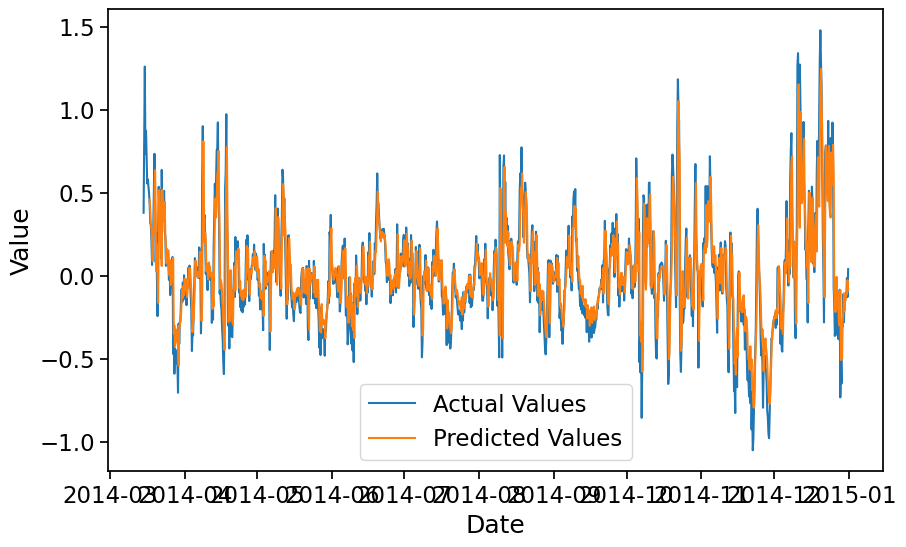

In [ ]:
#Low Level LSTM


# Read data from CSV file
df = pd.read_csv('output3.csv')

# Combine date and time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('datetime')

# Extract the values and scale them between 0 and 1
values = df['Predicted_Surge'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Create sequences for input and output
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 10

# Create sequences
x, y = create_sequences(scaled_values, sequence_length)

# Reshape input data for LSTM (samples, time steps, features)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=50, batch_size=32)

# Make predictions on the entire dataset
predicted_values = model.predict(x)

# Inverse transform the scaled values to get the actual values
predicted_values = scaler.inverse_transform(predicted_values)

mse = mean_squared_error(values[sequence_length:], predicted_values)
mae = mean_absolute_error(values[sequence_length:], predicted_values)
accuracy_percent = 1 - np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Accuracy Percent:", accuracy_percent)

# Create a DataFrame with the predicted values and corresponding dates
predicted_df = pd.DataFrame({'date': df.index[sequence_length:], 'predicted_value': predicted_values.flatten()})



# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Predicted_Surge'], label='Actual Values')
plt.plot(predicted_df['date'], predicted_df['predicted_value'], label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Epoch 1/50
37/37 [==============================] - 3s 8ms/step - loss: 0.0446
Epoch 2/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 3/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 4/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 7/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 8/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 9/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 10/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 11/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 12/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 13/50
37/37 [==============================

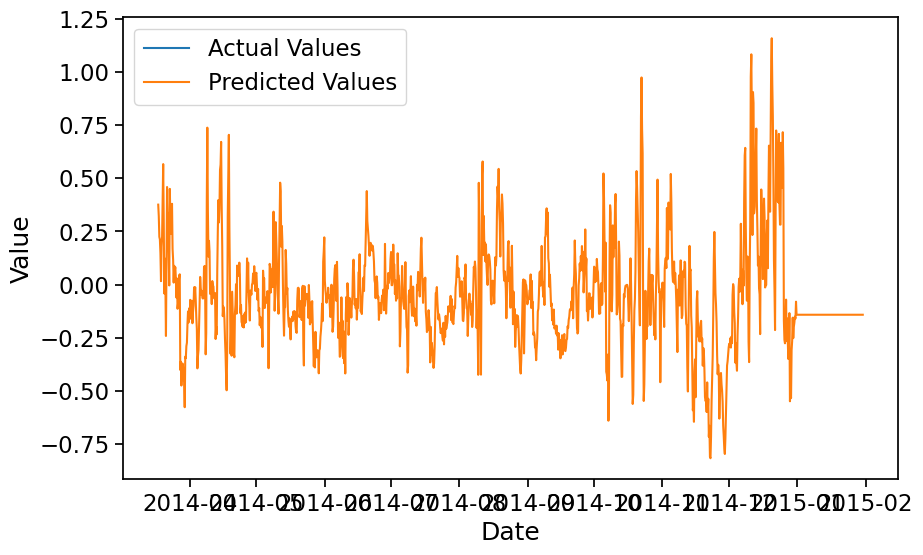

In [ ]:
#Low Level LSTM Future Prediction

# Read data from CSV file
df = pd.read_csv('output3.csv')

# Combine date and time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('datetime')

# Extract the values and scale them between 0 and 1
values = df['Predicted_Surge'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Create sequences for input and output
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 10

# Create sequences
x, y = create_sequences(scaled_values, sequence_length)

# Reshape input data for LSTM (samples, time steps, features)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=50, batch_size=32)

# Make predictions on the entire dataset
predicted_values = model.predict(x)

# Inverse transform the scaled values to get the actual values
predicted_values = scaler.inverse_transform(predicted_values)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(values[sequence_length:], predicted_values)
mae = mean_absolute_error(values[sequence_length:], predicted_values)
accuracy_percent = 1-np.sqrt(mse)

# Create a DataFrame with the predicted values and corresponding dates
predicted_df = pd.DataFrame({'date': df.index[sequence_length:], 'predicted_value': predicted_values.flatten()})

# Extend the prediction into the future
future_periods = 30  # Number of future periods to predict
future_predictions = []

for _ in range(future_periods):
    # Predict the next value
    next_x = np.array([x[-1]])  # Use the last sequence as input
    next_prediction = model.predict(next_x)
    future_predictions.append(next_prediction[0, 0])

    # Update the input sequence for the next prediction
    x = np.concatenate((x, next_x), axis=0)
    x = x[1:]

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions
future_dates = pd.date_range(start=df.index[-1], periods=future_periods+1, closed='right')

# Create a DataFrame for the future predictions
future_df = pd.DataFrame({'date': future_dates[:], 'predicted_value': future_predictions.flatten()})

# Concatenate the actual and future predicted values
combined_df = pd.concat([df, predicted_df, future_df])

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Accuracy Percent:", accuracy_percent)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(combined_df['date'], combined_df['Predicted_Surge'], label='Actual Values')
plt.plot(combined_df['date'], combined_df['predicted_value'], label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
x.shape

(5839, 186)

In [ ]:
y.shape

(23376,)

In [ ]:
x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)


In [ ]:
x_cnn = [];
for i in range(x.shape[0]):
    x_seq = np.array(x[i, :]).reshape(1, x.shape[1])
    x_cnn.append(x_seq)

n_steps = 186
n_features = 1

x_trn = np.array(x.copy())
x_trn = x_trn.reshape(x_trn.shape[0], 1, x_trn.shape[1])

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', \
                 input_shape=(5839, 186)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(x_trn, surge['surge'], epochs=1000, verbose=0)

ValueError: ignored

In [ ]:
x_norm_train

array([[-1.73168004,  0.42167951, -1.53336619, ...,  1.64670587,
        -0.08773406,  0.39835794],
       [-1.73093842,  0.61715977, -1.48225843, ...,  1.39552918,
        -1.16409738,  0.0812966 ],
       [-1.7301968 ,  0.31311816, -1.07623574, ...,  0.98069269,
        -1.68641603,  0.21079009],
       ...,
       [ 1.7301968 , -0.1207782 , -0.75491941, ..., -0.90771374,
         0.1645265 ,  1.61717828],
       [ 1.73093842,  0.42342487,  0.27244105, ..., -0.47170891,
        -0.10591849,  1.4441908 ],
       [ 1.73168004,  1.32193591,  0.91412727, ...,  0.02085017,
        -0.50133305,  1.43183456]])

In [ ]:
x_norm_test

array([[-1.73056852,  2.46419944, -0.98763955, ...,  0.14310683,
        -0.94730642,  1.90436524],
       [-1.72760268,  2.04557075, -1.79658975, ...,  0.03669129,
        -1.05769076,  2.05075907],
       [-1.72463684,  1.94348291, -2.65448918, ..., -0.24644437,
        -0.60814842,  1.97414174],
       ...,
       [ 1.72463684,  0.8393583 , -0.6362357 , ...,  0.80333061,
        -1.16849642,  2.66677609],
       [ 1.72760268,  1.0699124 , -0.3688184 , ...,  0.58155167,
        -1.14490282,  2.60897105],
       [ 1.73056852,  1.29909619,  0.32729098, ...,  0.97909202,
        -0.80321693,  2.53851047]])

In [ ]:
y_train

,time,surge,date
5,973038,-0.173340,2011-01-02 06:00:00
6,973044,0.022045,2011-01-02 12:00:00
7,973050,-0.243710,2011-01-02 18:00:00
8,973056,-0.061471,2011-01-03 00:00:00
9,973062,-0.380670,2011-01-03 06:00:00
...,...,...,...
4671,1001034,-0.542870,2014-03-13 18:00:00
4672,1001040,0.029064,2014-03-14 00:00:00
4673,1001046,-0.525450,2014-03-14 06:00:00
4674,1001052,-0.297770,2014-03-14 12:00:00


In [ ]:
y_test

,time,surge,date,Date,Time
4676,1001064,0.269050,2014-03-15 00:00:00,2014-03-15,00:00:00
4677,1001070,0.863970,2014-03-15 06:00:00,2014-03-15,06:00:00
4678,1001076,0.715220,2014-03-15 12:00:00,2014-03-15,12:00:00
4679,1001082,0.411040,2014-03-15 18:00:00,2014-03-15,18:00:00
4680,1001088,0.337190,2014-03-16 00:00:00,2014-03-16,00:00:00
...,...,...,...,...,...
5839,1008042,0.098466,2014-12-30 18:00:00,2014-12-30,18:00:00
5840,1008048,0.056440,2014-12-31 00:00:00,2014-12-31,00:00:00
5841,1008054,0.243050,2014-12-31 06:00:00,2014-12-31,06:00:00
5842,1008060,0.119040,2014-12-31 12:00:00,2014-12-31,12:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit ARIMA model
model = ARIMA(y_train['surge'], order = (20, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

NotImplementedError: ignored

In [ ]:
# load the data
data_cuxhaven = pd.read_csv("Copy of cuxhaven_future.csv")

# rename the columns
data_cuxhaven.columns = ['time', 'surge','future']

In [ ]:
train_set,test_set=data_cuxhaven['time'],data_cuxhaven['surge']

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();